In [1]:
import pandas as pd
import numpy as np

# trực quan
import matplotlib.pyplot as plt
import seaborn as sb

# model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


# danh gia mo hinh
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay

# save model 
import joblib


# I. Feature Engineering

In [2]:
data = pd.read_csv(r'D:\DA\Tự học\Customer Churn Prediction\Dataset\Data_Analysis.csv', encoding='latin-1')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [3]:
for col in data:
    print(f'{col}: {data[col].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 '

need to drop 'tenure_group'

In [4]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_group           6
dtype: int64

## Feature Selection

In [5]:
data.drop('TotalCharges', axis = 1, inplace = True)

In [6]:
data.drop('tenure_group',axis=1, inplace = True)
data.drop('gender',axis=1,inplace=True) 

In [7]:
# Drop customerID
data.drop('customerID', axis=1, inplace=True)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


## Feature Transformation

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   object 
 2   Dependents        7032 non-null   object 
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  MonthlyCharges    7032 non-null   float64


In [9]:
# Định nghĩa thứ tự của Contract
contract_order = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

# Thực hiện Ordinal Encoding
data['Contract'] = data['Contract'].map(contract_order)

In [10]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)

In [11]:
data_dummies = pd.get_dummies(data, columns=['Partner', 'Dependents', 'PaperlessBilling', 'MultipleLines', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaymentMethod'], drop_first=True)
data_dummies.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,Churn,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,29.85,0,True,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
1,0,34,1,56.95,0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,0,2,0,53.85,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,1,42.30,0,False,False,False,True,False,...,True,False,True,False,False,False,False,False,False,False
4,0,2,0,70.70,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


### Select important attributes

In [12]:
#Create Feature variable X and Target variable y
X = data_dummies.drop(['Churn'], axis = 1)
y = data_dummies['Churn']

In [13]:
# using Chi-square test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [14]:
from sklearn.feature_selection import chi2
F_P_Score=chi2(X_train,y_train)
F_P_Score

(array([1.22703715e+02, 1.34621523e+04, 8.99781842e+02, 2.95946665e+03,
        6.77667619e+01, 1.13488771e+02, 8.61547926e+01, 1.49173554e+00,
        6.39553311e+00, 1.61665920e-01, 3.00510062e+02, 2.23039150e+02,
        2.23039150e+02, 1.07131767e+02, 2.23039150e+02, 2.64660565e+01,
        2.23039150e+02, 1.40968426e+01, 2.23039150e+02, 1.04982417e+02,
        2.23039150e+02, 1.14137163e+01, 2.23039150e+02, 1.21046077e+01,
        9.46969697e+01, 3.67302852e+02, 3.78480114e+01]),
 array([1.61907907e-028, 0.00000000e+000, 1.09457552e-197, 0.00000000e+000,
        1.84025698e-016, 1.68633647e-026, 1.66388188e-020, 2.21947377e-001,
        1.14407868e-002, 6.87627353e-001, 2.55062323e-067, 1.96556642e-050,
        1.96556642e-050, 4.16533521e-025, 1.96556642e-050, 2.68209778e-007,
        1.96556642e-050, 1.73635004e-004, 1.96556642e-050, 1.23224463e-024,
        1.96556642e-050, 7.29038546e-004, 1.96556642e-050, 5.02973771e-004,
        2.21878579e-022, 7.23523498e-082, 7.64763001e-

In [15]:
# Tạo DataFrame để xem kết quả dễ hơn
chi_square_results = pd.DataFrame({'Feature': X_train.columns, 'Chi2 Score': F_P_Score[0], 'P-value': F_P_Score[1]})
chi_square_results = chi_square_results.sort_values(by='Chi2 Score', ascending=False)

# Hiển thị các feature có ý nghĩa thống kê (p-value < 0.05)
important_features = chi_square_results[chi_square_results['P-value'] < 0.05]
print(important_features)

                                  Feature    Chi2 Score        P-value
1                                  tenure  13462.152281   0.000000e+00
3                          MonthlyCharges   2959.466655   0.000000e+00
2                                Contract    899.781842  1.094576e-197
25         PaymentMethod_Electronic check    367.302852   7.235235e-82
10            InternetService_Fiber optic    300.510062   2.550623e-67
22    StreamingMovies_No internet service    223.039150   1.965566e-50
20        StreamingTV_No internet service    223.039150   1.965566e-50
12     OnlineSecurity_No internet service    223.039150   1.965566e-50
14       OnlineBackup_No internet service    223.039150   1.965566e-50
11                     InternetService_No    223.039150   1.965566e-50
18        TechSupport_No internet service    223.039150   1.965566e-50
16   DeviceProtection_No internet service    223.039150   1.965566e-50
0                           SeniorCitizen    122.703715   1.619079e-28
5     

In [16]:
chi_square_results

,Feature,Chi2 Score,P-value
1,tenure,13462.152281,0.000000e+00
3,MonthlyCharges,2959.466655,0.000000e+00
2,Contract,899.781842,1.094576e-197
25,PaymentMethod_Electronic check,367.302852,7.235235e-82
10,InternetService_Fiber optic,300.510062,2.550623e-67
22,StreamingMovies_No internet service,223.039150,1.965566e-50
20,StreamingTV_No internet service,223.039150,1.965566e-50
12,OnlineSecurity_No internet service,223.039150,1.965566e-50
14,OnlineBackup_No internet service,223.039150,1.965566e-50
11,InternetService_No,223.039150,1.965566e-50


In [17]:
no_important_features = chi_square_results[chi_square_results['P-value'] >= 0.05]
no_important_features

,Feature,Chi2 Score,P-value
7,MultipleLines_No phone service,1.491736,0.221947
9,PhoneService_Yes,0.161666,0.687627


- With low chi_square (1.5 and 0.16) we can see that the relationship **PhoneService, MultipleLines** with **Churn** is weak
- p > 0.05 to conclude that there is not enough evidence to say that the variables 'MultipleLine' and 'PhoneService' have an impact on churning or not churning.
- And based on the stacked_table in the clean file, **PhoneService, MultipleLines** columns are almost the same, with no obvious difference, we see that these variables do not have much meaning in the model, we need to drop them to avoid Overfitting the model

In [18]:
#plot importance features based on P-value
P_ranked_features=pd.Series(F_P_Score[1],index=X_train.columns)
P_ranked_features.sort_index(ascending= False)

tenure                                    0.000000e+00
TechSupport_Yes                           1.232245e-24
TechSupport_No internet service           1.965566e-50
StreamingTV_Yes                           7.290385e-04
StreamingTV_No internet service           1.965566e-50
StreamingMovies_Yes                       5.029738e-04
StreamingMovies_No internet service       1.965566e-50
SeniorCitizen                             1.619079e-28
PhoneService_Yes                          6.876274e-01
PaymentMethod_Mailed check                7.647630e-10
PaymentMethod_Electronic check            7.235235e-82
PaymentMethod_Credit card (automatic)     2.218786e-22
Partner_Yes                               1.840257e-16
PaperlessBilling_Yes                      1.663882e-20
OnlineSecurity_Yes                        4.165335e-25
OnlineSecurity_No internet service        1.965566e-50
OnlineBackup_Yes                          2.682098e-07
OnlineBackup_No internet service          1.965566e-50
MultipleLi

In [19]:
# drop PhoneService, MultipleLines
data.drop('PhoneService', axis = 1, inplace = True)
data.drop('MultipleLines', axis = 1, inplace = True)

In [20]:
data = pd.get_dummies(data)
data.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,29.85,0,False,True,True,False,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,1,56.95,0,True,False,True,False,True,...,False,True,False,False,True,False,False,False,False,True
2,0,2,0,53.85,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,1,42.30,0,True,False,True,False,True,...,False,True,False,False,True,False,True,False,False,False
4,0,2,0,70.70,1,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


In [21]:
data.columns

Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges', 'Churn',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
# to_csv
data.to_csv('D:\DA\Tự học\Customer Churn Prediction\Dataset\Data_Feature_Engineering.csv', index=False)

# II. Model Deployment and Performance Evaluate

In [23]:
X=data.drop('Churn',axis=1)
X

,SeniorCitizen,tenure,Contract,MonthlyCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,29.85,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,1,56.95,True,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
2,0,2,0,53.85,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,1,42.30,True,False,True,False,True,False,...,False,True,False,False,True,False,True,False,False,False
4,0,2,0,70.70,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,1,84.80,False,True,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True
7028,0,72,1,103.20,False,True,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
7029,0,11,0,29.60,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
7030,1,4,0,74.40,False,True,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [24]:
y=data['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [25]:
# Chia dữ liệu thành 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 35) (5625,)
(1407, 35) (1407,)


In [26]:
print("User Input Columns:", data.columns)  # Kiểm tra đầu vào
print("Expected Columns:", X_train.columns)   # Kiểm tra cột từ model

User Input Columns: Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges', 'Churn',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
  

In [27]:
#correlation
correlation = X_train.corr()
correlation

,SeniorCitizen,tenure,Contract,MonthlyCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.014013,-0.134065,0.213735,-0.019028,0.019028,0.212468,-0.212468,-0.106597,0.248216,...,0.116880,0.032125,-0.176844,0.116682,-0.154628,0.154628,-0.017255,-0.027639,0.169793,-0.148038
tenure,0.014013,1.000000,0.675395,0.250410,-0.381717,0.381717,-0.160959,0.160959,0.004354,0.028416,...,0.277201,-0.249158,-0.039397,0.282864,-0.007407,0.007407,0.239314,0.236895,-0.214713,-0.227129
Contract,-0.134065,0.675395,1.000000,-0.068229,-0.290174,0.290174,-0.237013,0.237013,0.048817,-0.244967,...,0.099147,-0.310364,0.239747,0.109206,0.170145,-0.170145,0.176197,0.221193,-0.343347,-0.003416
MonthlyCharges,0.213735,0.250410,-0.068229,1.000000,-0.101056,0.101056,0.112633,-0.112633,-0.165005,0.788883,...,0.631062,0.016909,-0.763056,0.625431,-0.344420,0.344420,0.042834,0.030703,0.267130,-0.375291
Partner_No,-0.019028,-0.381717,-0.290174,-0.101056,1.000000,-1.000000,0.452721,-0.452721,0.005998,-0.008704,...,-0.126611,0.113500,0.003587,-0.116765,-0.010699,0.010699,-0.118353,-0.079050,0.081817,0.102406
Partner_Yes,0.019028,0.381717,0.290174,0.101056,-1.000000,1.000000,-0.452721,0.452721,-0.005998,0.008704,...,0.126611,-0.113500,-0.003587,0.116765,0.010699,-0.010699,0.118353,0.079050,-0.081817,-0.102406
Dependents_No,0.212468,-0.160959,-0.237013,0.112633,0.452721,-0.452721,1.000000,-1.000000,-0.052833,0.163976,...,0.016262,0.079083,-0.137169,0.036221,-0.113242,0.113242,-0.052550,-0.052852,0.142864,-0.057737
Dependents_Yes,-0.212468,0.160959,0.237013,-0.112633,-0.452721,0.452721,-1.000000,1.000000,0.052833,-0.163976,...,-0.016262,-0.079083,0.137169,-0.036221,0.113242,-0.113242,0.052550,0.052852,-0.142864,0.057737
InternetService_DSL,-0.106597,0.004354,0.048817,-0.165005,0.005998,-0.005998,-0.052833,0.052833,1.000000,-0.643490,...,0.006692,0.294788,-0.378552,0.023257,0.069745,-0.069745,0.016618,0.050257,-0.093037,0.039441
InternetService_Fiber optic,0.248216,0.028416,-0.244967,0.788883,-0.008704,0.008704,0.163976,-0.163976,-0.643490,1.000000,...,0.338670,0.067495,-0.464895,0.323730,-0.328011,0.328011,-0.014839,-0.049876,0.324615,-0.303926


In [28]:
X_train

,SeniorCitizen,tenure,Contract,MonthlyCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1408,0,65,2,94.55,False,True,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False
6992,0,26,0,35.75,True,False,True,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3349,0,68,2,90.20,False,True,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
4486,0,3,0,84.30,True,False,True,False,False,True,...,False,False,False,True,True,False,False,False,True,False
3535,0,49,0,40.65,False,True,True,False,True,False,...,True,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,1,65,1,70.95,False,True,True,False,False,True,...,False,True,False,False,False,True,True,False,False,False
5115,1,15,0,75.30,True,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4128,0,36,2,92.90,False,True,False,True,True,False,...,True,False,False,True,False,True,False,True,False,False
4242,0,10,1,65.90,False,True,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True


In [29]:
threshold=0.3

## Logistic Regression

In [30]:
# Khởi tạo mô hình
lr_model = LogisticRegression(random_state=50)

# 2. Định nghĩa grid các hyperparameter cần thử
param_grid = {
    'C': 10.0 ** np.arange(-2, 3),
    'penalty': ['l1', 'l2']
}

# 3. Định nghĩa phương pháp Cross Validation
cv = KFold(n_splits=10, random_state=None, shuffle=False)

# 4. Khởi tạo GridSearchCV
lr_model = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
    scoring='recall'
)

# Train mô hình
lr_model.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\AppData\L

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=50), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [31]:
# Dự đoán trên tập test
y_pred_lr = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred_lr)}")
# Tính độ chính xác
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
# Báo cáo chi tiết
print(f"Classification Report:\n {classification_report(y_test, y_pred_lr)}")
print(f"ROC-AUC: {roc_auc_score(y_test,y_pred_lr)}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC Curve (AUC = {auc(fpr, tpr)})")

Confusion Matrix:
 [[916 117]
 [163 211]]
Accuracy: 0.8009950248756219
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407

ROC-AUC: 0.7254543901517309
ROC Curve (AUC = 0.8341417707626922)


- Accuracy **0.8** - High but not reliable enough when data is imbalanced
- Recall (class 1) is **0.56** --> The model still misses a lot of customers who are actually about to leave --> do not use this model
- AUC **0.72** --> The ability to distinguish between two layers is at a fairly average level.

--> I will try to using class_weight='balanced' 

In [32]:
# Khởi tạo mô hình
lr_model = LogisticRegression(random_state=50, class_weight='balanced')

# 2. Định nghĩa grid các hyperparameter cần thử
grid = {
    'C': 10.0 ** np.arange(-2, 3),
    'penalty': ['l1', 'l2']
}

# 3. Định nghĩa phương pháp Cross Validation
cv = KFold(n_splits=10, random_state=None, shuffle=False)

# 4. Khởi tạo GridSearchCV
lr_model = GridSearchCV(
    estimator=lr_model,
    param_grid=grid,
    cv=cv,
    n_jobs=-1,
    scoring='recall'
)

# Train mô hình
lr_model.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\AppData\L

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=50),
             n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [33]:
# Dự đoán trên tập test
y_pred_lr = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred_lr)}")
# Tính độ chính xác
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
# Báo cáo chi tiết
print(f"Classification Report:\n {classification_report(y_test, y_pred_lr)}")
print(f"ROC-AUC: {roc_auc_score(y_test,y_pred_lr)}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC Curve (AUC = {auc(fpr, tpr)})")

Confusion Matrix:
 [[733 300]
 [ 77 297]]
Accuracy: 0.7320540156361052
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

ROC-AUC: 0.751850691874039
ROC Curve (AUC = 0.8333497264082083)


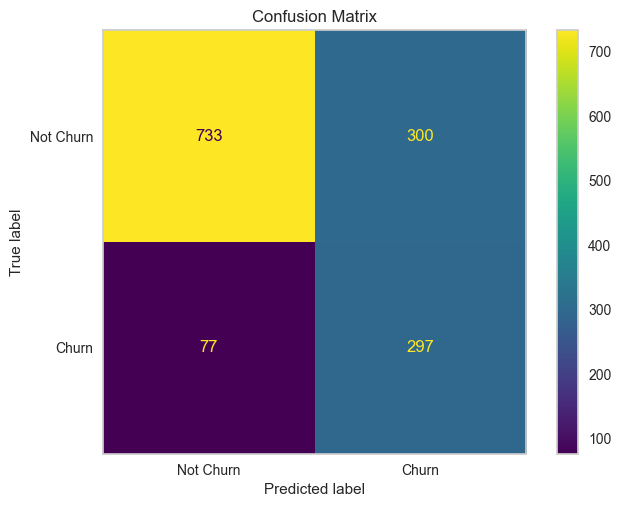

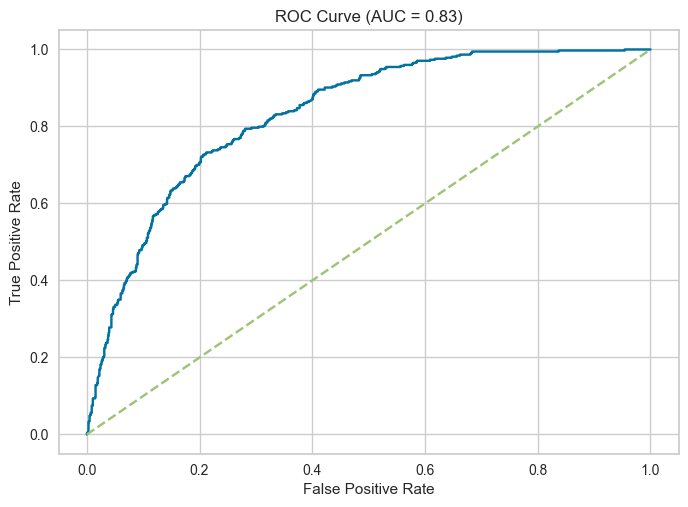

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


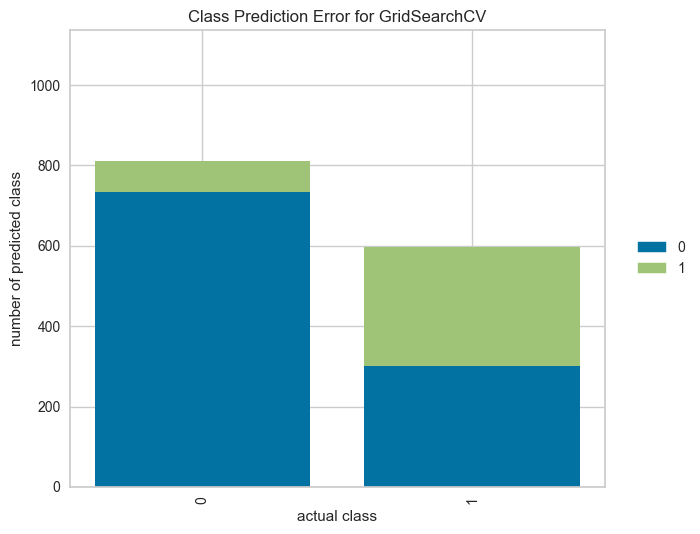

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


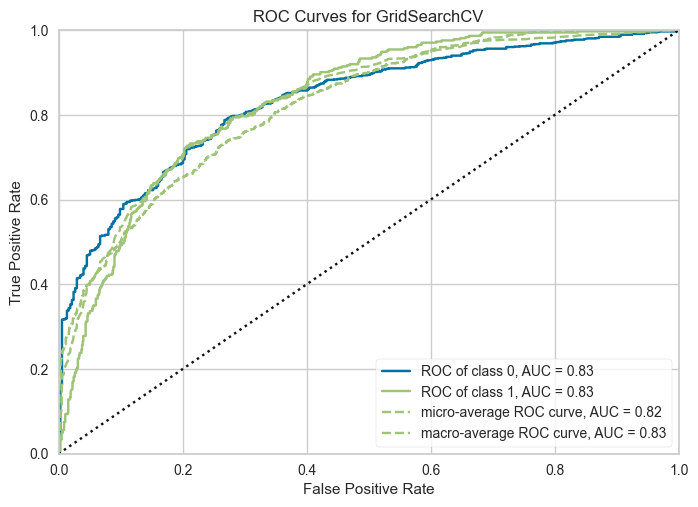

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [34]:
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC

# fig, axes = plt.subplots(2, 2, figsize=(20, 22))
# D. Vẽ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Churn', 'Churn'])
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix')
plt.show()

# F. Vẽ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()

visualizer = ClassPredictionError(lr_model)
visualizer.fit(X=X_train, y=y_train)
visualizer.score(X=X_test, y=y_test)
visualizer.poof()

visualizer = ROCAUC(lr_model, classes=y_pred_lr)
visualizer.fit(X=X_train, y=y_train)  
visualizer.score(X=X_test, y=y_test)  
visualizer.poof()

- Recall (class 1) has been improved **(0.56 --> 0.79)** a lot and the model performs very well in correctly predicting many true churners (TP) and with a low number of false churners (FN)
- Precision class 1 is reduced (from 64% → 50%), but this is acceptable in business if you want to keep customers.
- ROC Curve (AUC = 0.83) shows that the model is quite good at distinguishing churn vs non-churn, The curve above the diagonal is very convex at the left corner --> the model distinguishes the two classes very well.
- ROC-AUC has been improved **(0.72 --> 0.75)**


## Decision Tree Classifier

In [35]:
param_grid = {
    'random_state': [50, 100],
    'max_depth': [8, 15, 30, 50],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}

# Khởi tạo mô hình
dt_model = DecisionTreeClassifier()

dt_model = GridSearchCV(estimator = dt_model, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
        
# Train mô hình
dt_model.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 15, 30, 50], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'random_state': [50, 100]},
             verbose=2)

In [36]:
print("Best Params:", dt_model.best_params_)
print("Best Score:", dt_model.best_score_)

Best Params: {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 12, 'random_state': 100}
Best Score: 0.7884439612396731


In [37]:
dt_model = DecisionTreeClassifier(
    class_weight='balanced',
    criterion='gini',
    random_state=100,
    max_depth=8,
    max_features=3,
    min_samples_leaf=5,
    min_samples_split=12
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=8, max_features=3,
                       min_samples_leaf=5, min_samples_split=12,
                       random_state=100)

In [38]:
# Dự đoán trên tập test
y_pred_dt = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred_dt)}")
# Tính độ chính xác
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
# Báo cáo chi tiết
print(f"Classification Report:\n {classification_report(y_test, y_pred_dt)}")
print(f"ROC-AUC: {roc_auc_score(y_test,y_pred_dt)}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC Curve (AUC = {auc(fpr, tpr)})")

Confusion Matrix:
 [[714 319]
 [ 82 292]]
Accuracy: 0.7149964463397299
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

ROC-AUC: 0.7359696848905892
ROC Curve (AUC = 0.7983354126654622)


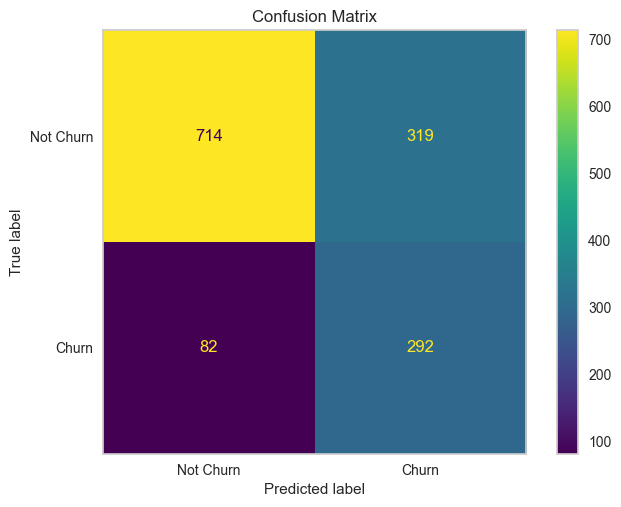

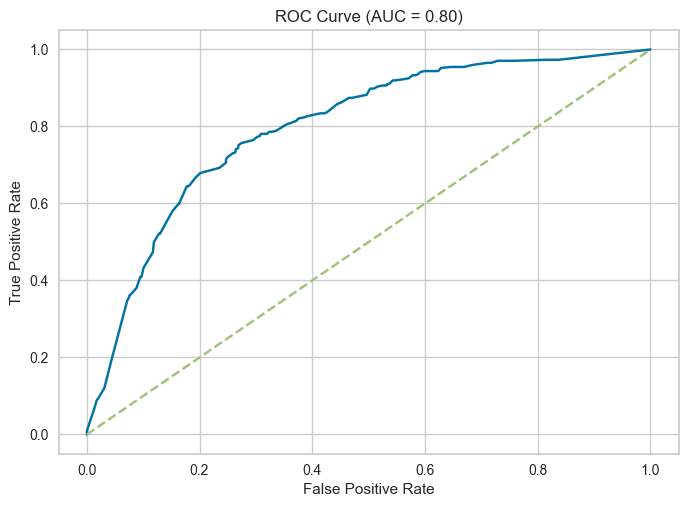

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


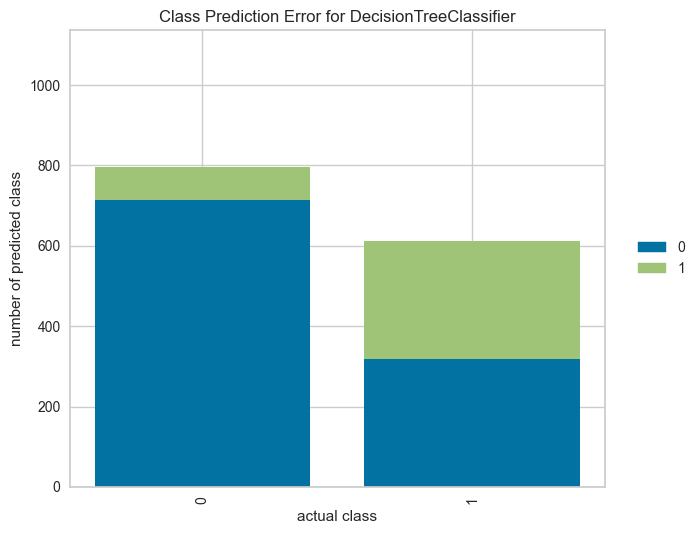

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


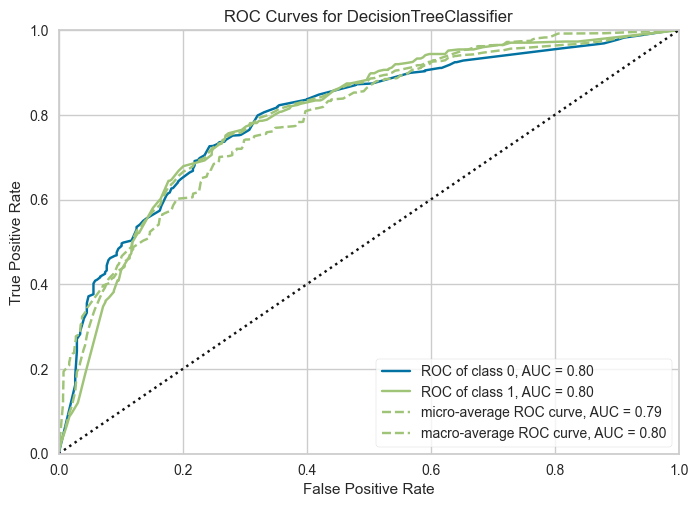

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [39]:
# D. Vẽ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Churn', 'Churn'])
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix')
plt.show()

# F. Vẽ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()

visualizer = ClassPredictionError(dt_model)
visualizer.fit(X=X_train, y=y_train)
visualizer.score(X=X_test, y=y_test)
visualizer.poof()

visualizer = ROCAUC(dt_model, classes=y_pred_dt)
visualizer.fit(X=X_train, y=y_train)  
visualizer.score(X=X_test, y=y_test)  
visualizer.poof()

- Recall = 78%: Also catches most of the customers who are about to churn, suitable for retention goals.
- Precision = 48%: The cost of wrong care is quite high—if you send promotions or call 100 customers, ~52 people will be loyal customers.
- AUC = 0.80: Shows that the model is “good” but not really strong enough to be used alone in production.

## Random Forest Classifier

In [40]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 20, 30],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [20,50,100, 200, 300]
}

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(class_weight='balanced')

rf_model = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

# Train mô hình
rf_model.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 20, 30],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [20, 50, 100, 200, 300]},
             verbose=2)

In [41]:
print("Best Params:", rf_model.best_params_)
print("Best Score:", rf_model.best_score_)

Best Params: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Best Score: 0.7765307863946955


In [42]:
rf_model = RandomForestClassifier(
    class_weight='balanced',
    bootstrap= True,
    max_depth= 15,
    max_features= 'sqrt',
    min_samples_leaf=4,
    min_samples_split=8,
    n_estimators=20
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=20)

In [43]:
# Dự đoán trên tập test
y_pred_rf = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred_rf)}")
# Tính độ chính xác
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
# Báo cáo chi tiết
print(f"Classification Report:\n {classification_report(y_test, y_pred_rf)}")
print(f"ROC-AUC: {roc_auc_score(y_test,y_pred_rf)}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC Curve (AUC = {auc(fpr, tpr)})")

Confusion Matrix:
 [[795 238]
 [106 268]]
Accuracy: 0.7555081734186212
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.53      0.72      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407

ROC-AUC: 0.7430903189402136
ROC Curve (AUC = 0.826078966304466)


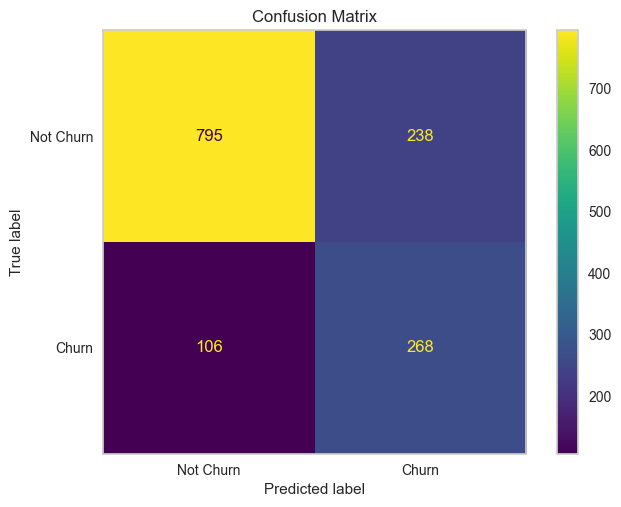

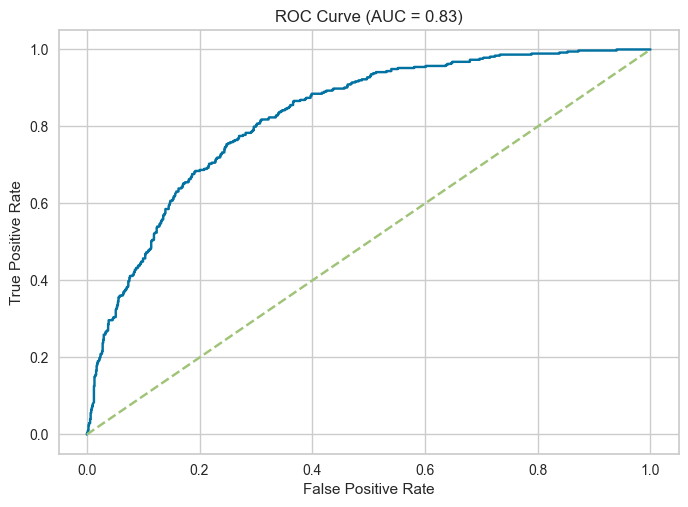

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


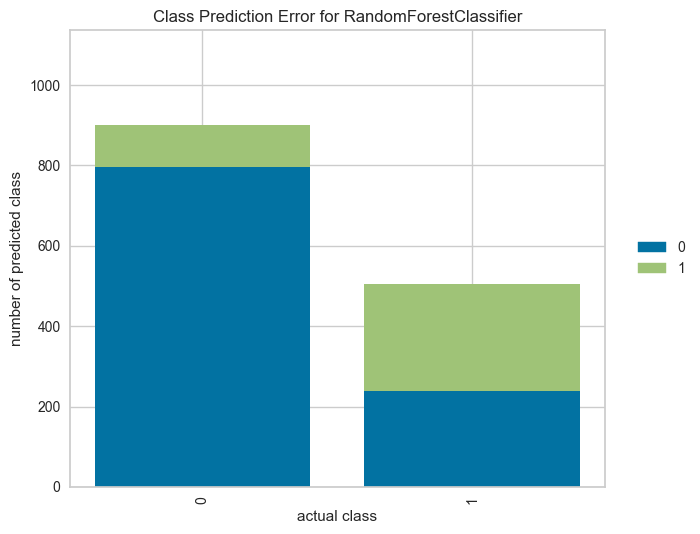

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


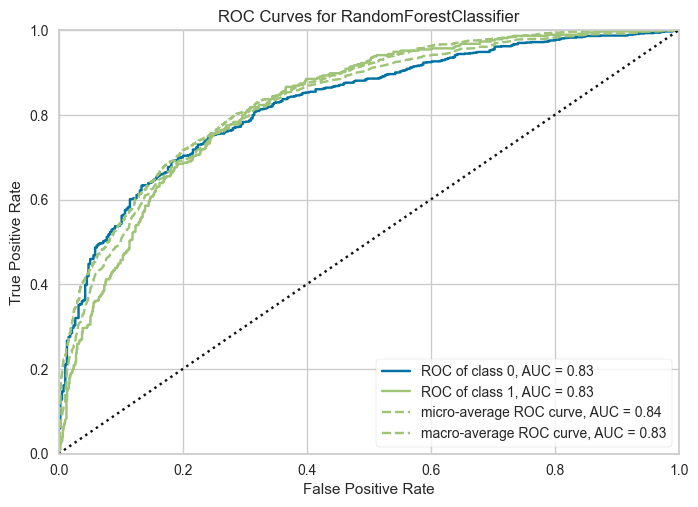

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [44]:
# D. Vẽ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Churn', 'Churn'])
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix')
plt.show()

# F. Vẽ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()

visualizer = ClassPredictionError(rf_model)
visualizer.fit(X=X_train, y=y_train)
visualizer.score(X=X_test, y=y_test)
visualizer.poof()

visualizer = ROCAUC(rf_model, classes=y_pred_rf)
visualizer.fit(X=X_train, y=y_train)  
visualizer.score(X=X_test, y=y_test)  
visualizer.poof()

- Recall = 72% --> Is not good if compare with Logistic, Decision Tree
- 107 customers who really want to leave but are not detected by the model --> causing business losses
- ROC Curve (AUC = 0.83) shows that the model is quite good at distinguishing churn vs non-churn, The curve above the diagonal is very convex at the left corner --> the model distinguishes the two classes very well.

## XGBoost

In [45]:
#hyperparameter tuning
params={
    'learning_rate'   : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth'       : [3,4,5,6,8,10,12],
    'min_child_weight': [1,3,5,7],
    'gamma'           : [0.0, 0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

In [46]:
# Đếm số lượng mẫu mỗi lớp
counts = np.bincount(y_train)
majority = counts[0]
minority = counts[1]

# Tính ratio
ratio = majority / minority
print("scale_pos_weight ratio =", ratio)

scale_pos_weight ratio = 2.762541806020067


In [47]:
Xgb_model= xgb.XGBClassifier(scale_pos_weight=ratio)

# Gán mô hình đã GridSearchCV vào biến mới
Xgb_model = GridSearchCV(estimator=Xgb_model, param_grid=params, 
                         cv=10, scoring='recall', verbose=2, n_jobs=-1)

Xgb_model.fit(X_train, y_train)

Fitting 10 folds for each of 3360 candidates, totalling 33600 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12],
                         'min_child_weight': [1, 3, 5, 7]},
             scoring='recall', verbose=2)

In [48]:
print("Best Params:", Xgb_model.best_params_)
print("Best Score:", Xgb_model.best_score_)

Best Params: {'colsample_bytree': 0.4, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1}
Best Score: 0.8180581655480985


In [49]:
y_pred_xgb = Xgb_model.predict(X_test)#convert dataframe to array

print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred_xgb)}")
# Tính độ chính xác
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
# Báo cáo chi tiết
print(f"Classification Report:\n {classification_report(y_test, y_pred_xgb)}")
print(f"ROC-AUC: {roc_auc_score(y_test,y_pred_xgb)}")
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC Curve (AUC = {auc(fpr, tpr)})")

Confusion Matrix:
 [[727 306]
 [ 74 300]]
Accuracy: 0.7299218194740583
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407

ROC-AUC: 0.7529572244280974
ROC Curve (AUC = 0.826078966304466)


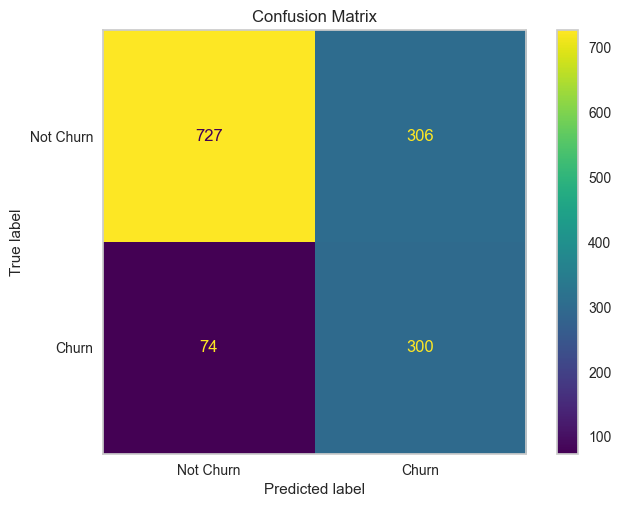

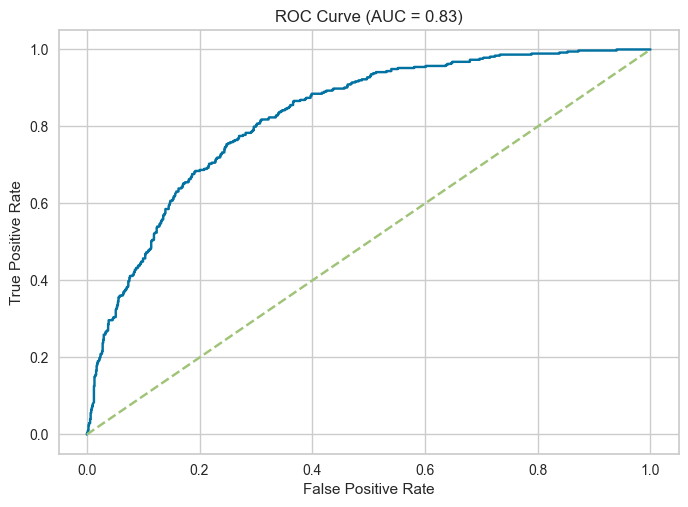

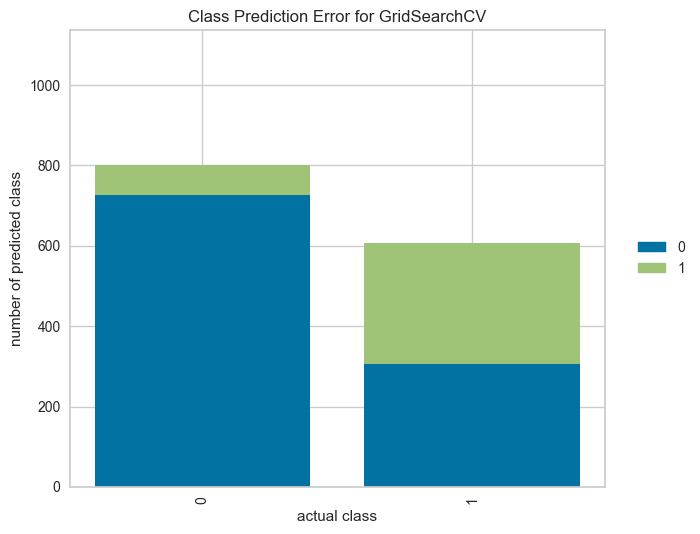

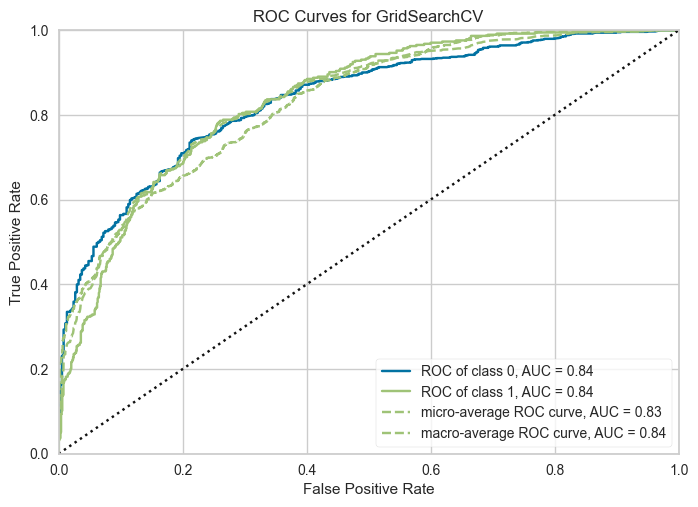

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [50]:
# D. Vẽ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Churn', 'Churn'])
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix')
plt.show()

# F. Vẽ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()

visualizer = ClassPredictionError(Xgb_model)
visualizer.fit(X=X_train, y=y_train)
visualizer.score(X=X_test, y=y_test)
visualizer.poof()

visualizer = ROCAUC(Xgb_model, classes=y_pred_xgb)
visualizer.fit(X=X_train, y=y_train)  
visualizer.score(X=X_test, y=y_test)  
visualizer.poof()

- Recall = 80% is the highest among the models we trained
- The model performs very well in correctly predicting many true churners (TP) and with a low number of false churners (FN)
- ROC Curve (AUC = 0.83) shows that the model is quite good at distinguishing churn vs non-churn, The curve above the diagonal is very convex at the left corner --> the model distinguishes the two classes very well.

# III. Conclusion

I. Feature Engineering

  1. Feature Selection

      - Features that impact the model the most: **tenure, MonthlyCharges, Contract**
      
      - Drop **TotalCharges, gender, tenure_group, customerID, PhoneService, MultipleLines**

      - Right skewed distribution in TotalCharges and MonthlyCharges, but not much, so We will normalize the data using StandardScaler

  2. Feature Transformation

      - The value variables have very few unique values, so I encoded the data

      - We have 15 nominal variables and 3 ordinal variables (include Contact, tenure, MonthlyCharges)

II. Model Deployment and Performance Evaluate

1. Logistic Regression

    - Thanks to class_weight, the model has a strong increase in Recall (~80%) – catching most of the customers at risk of churning. However, Precision is only ~50%, meaning that for every 2 customers targeted for “Churn”, only 1 person actually churns.

    - The model has good overall strength, regardless of the fixed threshold index, we can flexibly trade-off Precision/Recall according to your needs

    - The discrimination ability for both classes is equivalent, with no class the model is too weak or too strong. High macro-average shows that the overall model is good.

2. Decision Tree

    - Low Precision, so the cost of wrong care is quite large, easy to catch loyal customers

    - Decision Tree's ability to distinguish between the two layers is still "quite good" but not as strong as Logistic

3. Random Forest

    - Many customers really want to leave but are not detected by the model --> causing business losses

    - The ability to distinguish between the two layers is good

4. XGBoost

    - Least likely to lose customers without knowing it

    - Highest Recall, F1-score is stable

    - The ability to distinguish between the two layers is good

5. Score Evaluate

| Model | Recall (1) | Precision (1) | F1-score (1) | AUC | ROC-AUC | Accuracy |
| --- | --- | --- | --- |--- | --- | --- |
| Logistic Regression | 0.79 | 0.5 | 0.61 | 0.833 | 0.752 | 0.733 |
| Decision Tree | 0.78 | 0.48 | 0.59 | 0.798 | 0.735 | 0.714 |
| Random Forest | 0.71 | 0.52 | 0.6 | 0.825 | 0.726 | 0.747 |
| XGBoost | 0.8 | 0.5 | 0.61 | 0.821 |0.752 | 0.73 |


6. Choose Model

    - Overall, all 4 models have good Recall and good ability to distinguish between 2 layers.

    - Since the data is imbalanced, instead of using only one, we will prioritize other evaluation points

    - Based on the metrics: Because we want to suitable for the goal of **"not missing customers who really want to leave"**, We will choose **XGBoost** is the model with the best overall performance because:  

        - Only lose 47 customer 
        
        - Highest Recall for churn (80.38%) 
        
        - High AUC (83%)

        - Highest Precision for churn (61%)

        - Highest F1 for churn (61%) among the models.


## Save Model (Logistic Regression)

In [51]:
feature_names = X.columns  # Lấy tên cột từ DataFrame gốc
joblib.dump(feature_names, "Model\Feature_Names.pkl")  # Lưu danh sách cột

['Model\\Feature_Names.pkl']

In [52]:
joblib.dump(Xgb_model, 'Model\Churn_Model.pkl')

['Model\\Churn_Model.pkl']